# NAME SHOAIB FAROOQ

# REG# 21I-2278

# CLASS MS(DS)

# Libraries

In [1]:
#for work with numpy arrays
import numpy as np
#for work with dataframs
import pandas as pd
#for draw chats and graphs
import matplotlib.pyplot as plt
%matplotlib inline
#for controling string functions
#for representation of different data behaviours
import seaborn as sns
#for ploating
import plotly as py
import plotly.graph_objs as go
#Kmean classifier
from sklearn.cluster import KMeans
#using for Deep Copy
from copy import deepcopy

# Data Loading

In [2]:
#Load data from memory to program
Data = pd.read_csv("B:/FAST DS/S2/ML/ASSIBNMENT/A4/Mall_Customers.csv")
Data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#check number of empty spaes
print(Data.isnull().sum())
#check for na values
print(Data.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
# Replacement of columns names
Data.rename(index=str, columns={'Annual Income (k$)': 'AnnualIncome',
                              'Spending Score (1-100)': 'Spending Score'}, inplace=True)
Data.head()

,CustomerID,Gender,Age,AnnualIncome,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Ploting

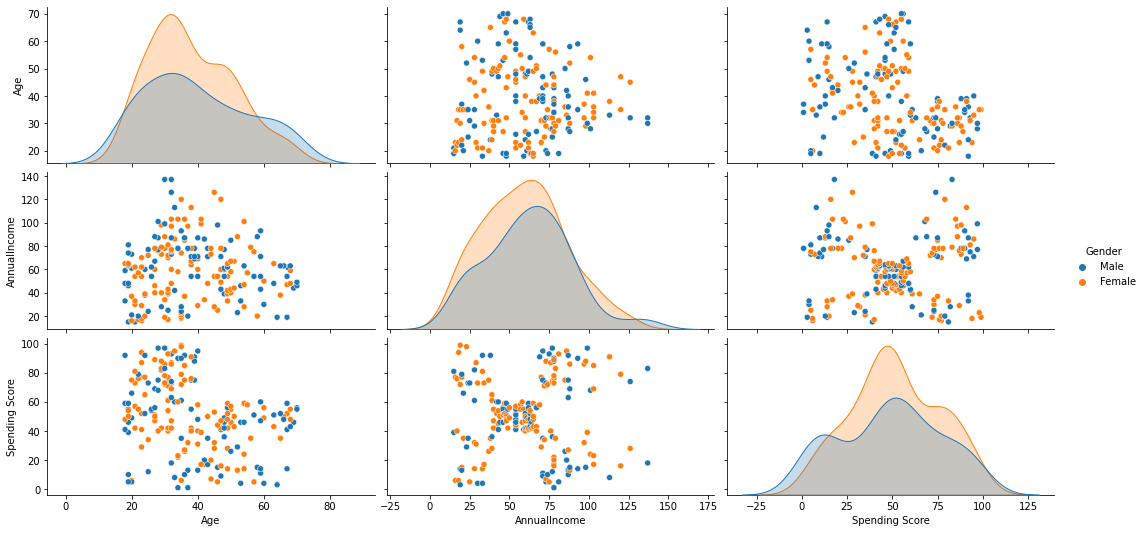

In [5]:
# Data set representation using pairplot
#Drop ID and remaning all using in ploting
sns.pairplot(Data.drop('CustomerID', axis=1), hue='Gender', aspect=2)
plt.show()

In [6]:
# From presentations shows that gender not directly relation to segmenting customers. 
#So we need to drop gender and ID

In [7]:
FilterData = Data.drop(['CustomerID', 'Gender'], axis=1)
FilterData.head()

,Age,AnnualIncome,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## Data Prepration

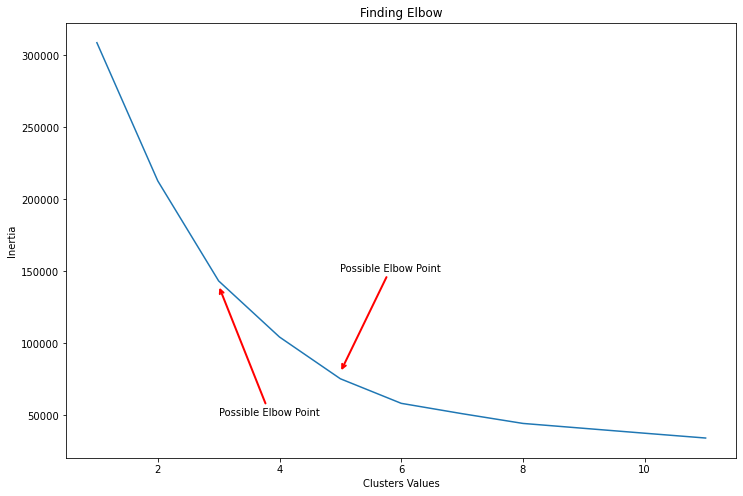

In [8]:
clusters = []

for i in range(1, 12):
    km = KMeans(n_clusters=i).fit(FilterData)
    clusters.append(km.inertia_)
clusters

#Draw Structure for finding Elbow    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 12)), y=clusters, ax=ax)
ax.set_title('Finding Elbow')
ax.set_xlabel('Clusters Values')
ax.set_ylabel('Inertia')

# For mention arrows on Plot
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))

plt.show()

In [ ]:
# Above representation shows tha approxometly we need number of cluster between 3 to 5

# CLUSTRING FROM SCRATCH

## Cluster IF K=3

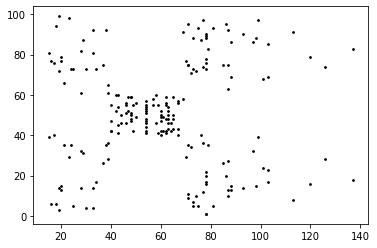

In [9]:
# Getting the values and plotting it
P1 = FilterData['AnnualIncome'].values
P2 = FilterData['Spending Score'].values
X = np.array(list(zip(P1, P2)))
plt.scatter(P1, P2, c='black', s=3)

In [13]:
#Function for Euclidean Distance Caculator
def dist(P1, P2, ax=1):
    print(np.linalg.norm(P1 - P2, axis=ax))
    return np.linalg.norm(P1 - P2, axis=ax)

In [14]:
# Number of clusters and intilization of centroid points
k = 3
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[ 50.  33.]
 [ 46.   9.]
 [101.  55.]]


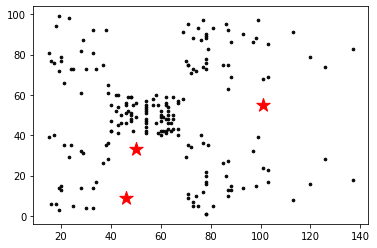

In [15]:
# Plotting along with the Centroids
plt.scatter(P1, P2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [16]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

137.88400922514546


In [17]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


[35.51056181 43.13930922 87.47571091]
[59.40538696 78.39005039 89.84430978]
[43.41658669 30.14962686 98.11218069]
[55.6057551  74.3236167  87.80091116]
[33.73425559 42.44997055 85.32877592]
[54.20332093 73.00684899 86.58521814]
[41.86884283 28.16025568 96.38464608]
[68.8839604  89.49301649 91.70605214]
[43.13930922 27.65863337 97.09788875]
[49.81967483 68.54195795 83.74365648]
[36.35931793 27.45906044 91.67878708]
[72.9177619  93.96275858 93.05912099]
[34.98571137 26.68332813 90.33825325]
[53.25410782 72.80109889 83.93449827]
[36.05551275 26.30589288 91.24143795]
[54.91812087 74.67261881 84.48076704]
[29.06888371 36.06937759 82.46211251]
[43.93176527 62.24146528 80.75270893]
[27.29468813 30.47950131 82.21921916]
[70.38465742 91.92388155 89.06739022]
[26.07680962 34.05877273 79.55501241]
[47.70744177 67.67569726 79.07591289]
[37.53664876 21.37755833 90.97252332]
[47.16990566 67.35725648 78.10249676]
[29.06888371 18.68154169 83.72574276]
[53.71219601 75.18643495 77.83315489]
[22.02271555

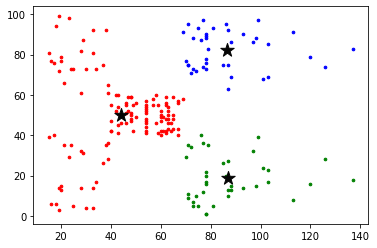

In [18]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


## Cluster IF K=5

In [19]:
# Number of clusters and intilization of centroid points
k = 5
#X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[ 88. 112.]
 [116.   0.]
 [101.  15.]
 [ 56. 116.]
 [ 14.  56.]]


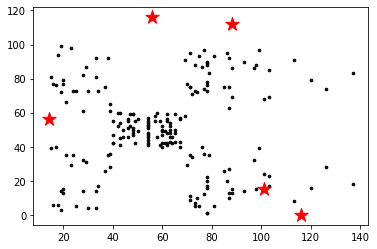

In [20]:
# Plotting along with the Centroids
plt.scatter(P1, P2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')

In [21]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2 3 4)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

253.16792845856287


In [22]:
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)


[103.23759005 108.26818554  89.28605714  87.23531395  17.02938637]
[ 79.30952024 129.4681428  108.40664186  53.90732789  25.01999201]
[128.14054784 100.17983829  85.47514259 117.04699911  50.03998401]
[ 80.05623024 126.21014222 105.20931518  55.86591089  21.09502311]
[101.11874208 106.77546535  87.64131446  85.42247948  16.2788206 ]
[ 79.60527621 124.80785232 103.81233067  55.86591089  20.22374842]
[127.02755607  98.18350167  83.48652586 116.37869221  50.15974482]
[ 72.277244   135.79396157 114.58621209  43.9089968   38.20994635]
[129.00387591  97.04638066  82.87339742 118.90332207  53.23532662]
[ 79.75587753 120.80149006  99.86490875  57.48912941  16.76305461]
[119.85407794  98.00510191  82.00609733 108.50345617  42.29657197]
[ 70.21395873 138.6001443  117.38824473  40.71854614  43.28972164]
[118.46096403  97.16480844  81.         107.22406446  41.43669871]
[ 76.47875522 123.06502346 102.00490184  53.07541804  21.84032967]
[120.10412149  96.87620967  81.0246876  109.1100362   43.41658

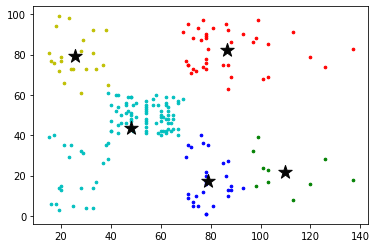

In [23]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')


# CLUSTRING USING LIBRARIES

## Cluster IF K=3

C:\Users\mshoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


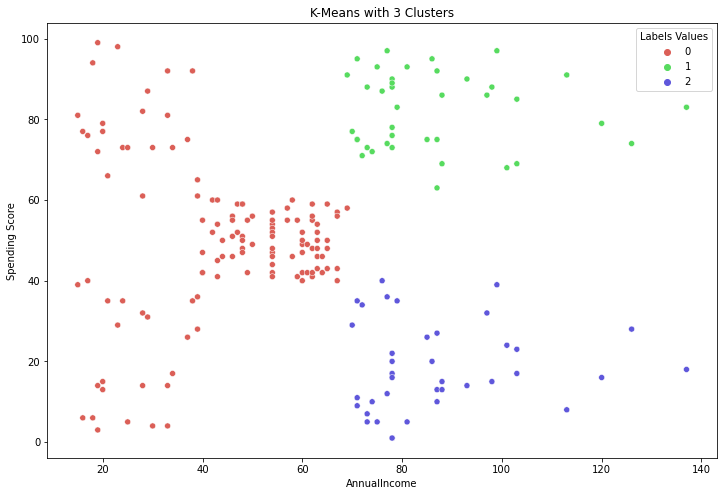

In [25]:

#number of cluster = 3
KMean_3= KMeans(n_clusters=3).fit(FilterData)
#Assign labels values 0.1.2
FilterData['Labels Values'] = KMean_3.labels_
#Ploting
plt.figure(figsize=(12, 8))

sns.scatterplot(FilterData['AnnualIncome'], FilterData['Spending Score'], hue=FilterData['Labels Values'],
                palette=sns.color_palette('hls', 3))
plt.title('K-Means with 3 Clusters')
plt.show()


## Cluster IF K=5

C:\Users\mshoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


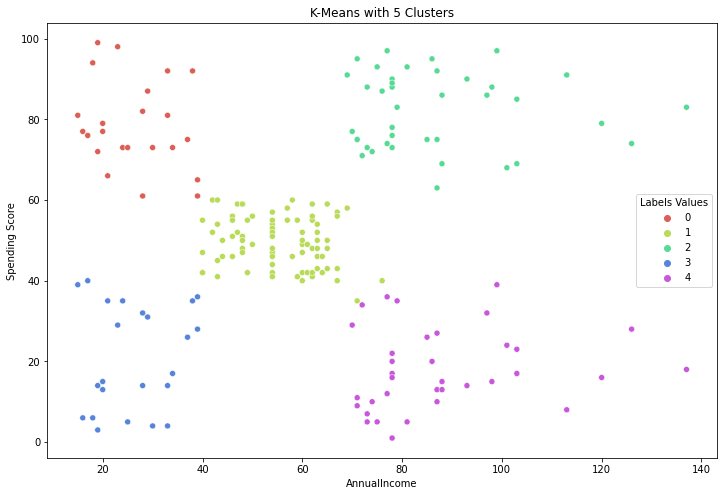

In [26]:

#number of cluster = 5
KMean_5 = KMeans(n_clusters=5).fit(FilterData)
#Assign labels values 0.1.2,4,5
FilterData['Labels Values'] = KMean_5.labels_
#Ploting
plt.figure(figsize=(12, 8))

sns.scatterplot(FilterData['AnnualIncome'], FilterData['Spending Score'], hue=FilterData['Labels Values'],
                palette=sns.color_palette('hls', 5))
plt.title('K-Means with 5 Clusters')
plt.show()